In [1]:
a = 1 + 1
print(a)

2


#   MODULE 1 - Introduction aux statistiques

In [4]:
!pip install pandas seaborn matplotlib numpy


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Definir ce qu'est une variable statistique et une variable


Comprendre les variables et leurs types:

Les bases essentielles pour analyser des données avec rigueur et précision

## Qu'est ce que la statistique ?

La statistique c'est la science de la collecte, du traitement, de l'analyse et de l'interpretation des données pour aider à la prise de décision

## Qu'est ce qu'une variable ?

Une variable est une information mesurée sur un individu, un objet ou une observation dans une étude statistique.

-> ÂGE : Mesure temporelle en années

-> TAILLE : Mesure physique en centimètres

-> REVENU : Mesure financière en euros

-> VILLE : Localisation géographique

-> SATISFACTION : Évaluation qualitative

## Distinguer variables quandtitatives et qualitatives

Variables quantitatives : Valeurs numérique mesurables et calculables

        |__ Variables continues : (un nombre infini de valeur), prennent n'importe quelle valeur dans un intervalle donné (avec virgule). ex: taille: 1,80 m; 1,75 m

        |__Variables discrètes : prennent uniquement des valeurs entières distinctes (sans virgule). ex: nombre d'enfants : 0,1,2,3


Variables qualitative : Catégories ou modalités descriptives

        |__ Variables Nominales : Pas d'ordre naturel entre les modalités. ex : ville: Paris, Bamako, Lyon, Marseille

        |__ Variables Ordianales : Les modalités ont un ordre logique. ex : Diplôme: Bac, licence, master, phd



Cette distinction fondamentale détermine toutes les méthodes d'analyse statistique

## Population, Échantillon et Paramètres

Population : est l'ensemble complet de tous les individus ou observations que nous souhaitons étudier. ex : Tous les étudiants français.

Échantillon : est un sous-ensemble de la population que nous observons ou mesurons réellement. ex : 1000 étudiants français sélectonnés au hasard.

Paramètres : ce sont des caractéristiques numériques qui décrivent la population dans son ensemble. ex : Moyenne d'âge de la population française d'étudiants.

# MODULE 2 - Statistique UNIVARIÉ

Objectifs pédagogiques

À la fin de cette partie, vous serez capables de :

- calculer et interpréter les mesures de tendance centrale : moyenne, médiane, mode ;

- calculer et interpréter les mesures de dispersion : variance, écart-type, étendue, coefficient de variation ;

- utiliser les quartiles et l’IQR pour détecter des valeurs extrêmes (outliers) ;

- analyser la forme d’une distribution (asymétrie / skewness, aplatissement / kurtosis) ;

- décrire une variable qualitative avec des effectifs, proportions et graphiques ;

- utiliser des tests de normalité (Shapiro-Wilk, Kolmogorov–Smirnov) et un Q-Q plot ;

- décider s’il est raisonnable de supposer la normalité d’une variable.

In [11]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [12]:
# Imports de base

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats #pour les statistiques

# Optionnel : pour des graphiques un peu plus jolis si installé
try:
    import seaborn as sns
    sns.set(style="whitegrid")
except ImportError:
    sns = None

# Affichage plus lisible
pd.set_option("display.max_columns", None)

In [13]:
# On va charger les jeu de données

df = pd.read_csv("ecommerce_dataset.csv")
df.head()

,client_id,sexe,âge,revenu_mensuel,segment_age,revenu_cat,produit,canal_achat,montant_panier,panier_frequent,note_satisfaction,retour_produit,date_achat
0,1,Homme,50,3893.70,Mature,Moyen,Sport,Mobile,83.27,Non,2,Non,2023-05-28
1,2,Femme,39,2885.15,Adulte,Moyen,Électronique,Mobile,47.18,Oui,3,Non,2023-01-13
2,3,Homme,44,2369.53,Mature,Moyen,Sport,Mobile,72.28,Oui,4,Non,2023-03-13
3,4,Homme,38,3197.92,Adulte,Moyen,Électronique,Mobile,54.59,Non,3,Non,2023-05-07
4,5,Homme,20,3774.66,Jeune,Moyen,Sport,Mobile,75.30,Non,4,Non,2023-07-04


In [15]:
# un petit aperçu pour voir rapidement la structure de notre jeu de donnée
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          15000 non-null  int64  
 1   sexe               15000 non-null  str    
 2   âge                15000 non-null  int64  
 3   revenu_mensuel     15000 non-null  float64
 4   segment_age        15000 non-null  str    
 5   revenu_cat         15000 non-null  str    
 6   produit            15000 non-null  str    
 7   canal_achat        15000 non-null  str    
 8   montant_panier     15000 non-null  float64
 9   panier_frequent    15000 non-null  str    
 10  note_satisfaction  15000 non-null  int64  
 11  retour_produit     15000 non-null  str    
 12  date_achat         15000 non-null  str    
dtypes: float64(2), int64(3), str(8)
memory usage: 1.5 MB


 Nous allons principalement utiliser dans ce notebook :

des variables quantitatives : âge, revenu_mensuel, montant_panier, note_satisfaction ;
des variables qualitatives : sexe, segment_age, revenu_cat, produit, canal_achat, panier_frequent, retour_produit.

## Analyse des données

### -> Analyse univariée des variables quantitatives

Une variable quantitative peut être résumée selon plusieurs axes :
tendance centrale, dispersion, position, forme, visualisation

| **Catégorie** | **Indicateurs / Outils** | **Description / Interprétation** |
|---------------|---------------------------|----------------------------------|
| **Tendance centrale** | **Moyenne** | Niveau moyen de la variable |
| | **Médiane** | Valeur centrale (50% en dessous, 50% au-dessus) |
| | **Mode** | Valeur la plus fréquente |
| **Dispersion** | **Variance** | Dispersion autour de la moyenne |
| | **Écart-type** | Variabilité typique (racine de la variance) |
| | **Étendue (Range)** | max − min |
| | **Coefficient de variation (CV)** | Variation relative : écart-type ÷ moyenne |
| **Position** | **Quartiles (Q1, Q2, Q3)** | Coupent la distribution en 4 parties |
| | **Quantiles (déciles, percentiles)** | Découpages plus fins de la distribution |
| | **IQR (Interquartile Range)** | Q3 − Q1, dispersion robuste |
| | **Bornes outliers** | Q1 − 1.5×IQR ; Q3 + 1.5×IQR |
| **Forme de la distribution** | **Skewness (asymétrie)** | >0 queue droite ; <0 queue gauche |
| | **Kurtosis (aplatissement)** | >0 pointue ; <0 plate ; ≈0 proche normale |
| **Visualisations** | **Histogramme** | Répartition par classes |
| | **KDE (densité)** | Courbe lissée de la distribution |
| | **Boxplot** | Quartiles + outliers |
| | **Violin plot** | Boxplot + densité |
| | **Line plot** | Évolution temporelle si données chronologiques |

In [18]:
# on va extraire la variable quantitative à analyser
variable = "montant_panier"
serie = df[variable]
serie.describe()

count    15000.000000
mean        93.357107
std         66.260809
min         10.320000
25%         48.310000
50%         73.530000
75%        117.295000
max        929.970000
Name: montant_panier, dtype: float64


## > Mesures de tendance centrale

Les mesures de tendance centrale résument le **niveau "moyen"** de la variable.

- **Moyenne** :
  $$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$
- **Médiane** : valeur qui coupe la distribution en deux parties égales (50% des valeurs en dessous, 50% au-dessus).
- **Mode** : valeur la plus fréquente (surtout utile pour les distributions discrètes ou qualitatives).


In [29]:
# Calculs en Python

# On calcule la moyenne
mean_value = serie.mean()
print(f"Moyenne : {mean_value:.2f}")

# -//- la mediane
median_value = serie.median()
print(f"Médiane : {median_value:.2f}")

# -//- le mode
mode_values = serie.mode()  # peut retourner plusieurs valeurs
print("Mode(s) :")
print(mode_values)

Moyenne : 93.36
Médiane : 73.53
Mode(s) :
0    62.12
Name: montant_panier, dtype: float64


**Interprétation :**
- Si la moyenne et la médiane sont proches, la distribution est souvent relativement **symétrique**.
- Si la moyenne est nettement > médiane → asymétrie à droite (queue à droite).
- Si la moyenne est nettement < médiane → asymétrie à gauche.

Médiane = 73.53 ---> veut dire qu'on à 50% des valeurs sont < à 73.53 et 50% sont > à 73.53 dans le panier du site ecom.

Et quand une personne vient sur le site ecom en moyenne il dépense 93.36 euros

Mais on observe aussi que 50% dépense moins de 73.53 et que 50% dépense plus de 73.53

## > Mesures de dispersion


###   Mesures de dispersion

Les mesures de dispersion indiquent **à quel point les valeurs sont dispersées autour de la moyenne**.

- **Variance** :
  $$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$
- **Écart-type** : racine carrée de la variance
  $$s = \sqrt{s^2}$$
- **Étendue** : max - min
- **Coefficient de variation (CV)** :
  $$CV = \frac{s}{\bar{x}} \times 100\%$$
  Permet de comparer la dispersion **relativement** à la moyenne.


In [32]:
# On va calculer la variance, l'écart-type, l'étendue et le coefficient de variation

variance = serie.var(ddof=1)          # variance empirique
std_dev = serie.std(ddof=1)           # écart-type
vmin = serie.min()
vmax = serie.max()
etendue = vmax - vmin
cv = (std_dev / mean_value) * 100

print(f"Variance : {variance:.2f}")
print(f"Écart-type : {std_dev:.2f}")
print(f"Min : {vmin:.2f}")
print(f"Max : {vmax:.2f}")
print(f"Étendue : {etendue:.2f}")
print(f"Coefficient de variation : {cv:.2f} %")

Variance : 4390.49
Écart-type : 66.26
Min : 10.32
Max : 929.97
Étendue : 919.65
Coefficient de variation : 70.98 %


-->  Plus la variance est élevée plus la variabilité est importante. Donc en soit on ne peut pas l'analyser en elle même.

Mais le plus important c'est l'écart-type. Car ici c'est 66.26 et cela veut dire qu'en MOYENNE les valeurs du montant du panier s'écartent d'environ 66 euros autour de la valeur moyenne (de 93.36 euros)

On dit qu'on a donc une dispertion de 66 euros en moyenne. Et cela confirme qu'on a une grande variabilité dans le montant du panier parce que 66 euros autour de 93 euros est une grande variabilité.

--> Le montant le plus petit qu'une personne va dépenser sur le site est de 10.32 euro dans la BDD. Et le plus grand montant est de 929.87 euros.

--> On peut aussi analyser l'étendue : c'est le max moins le min. Et ici on remarque que l'étendue est de 919.65 et que c'est proche du max et cela indique qu'on a une grande dispersion dans nos données donc le montant du panier à un large intervalle

--> Le coefficient de variation (cv) exprime en pourcentage la moyenne de la dispersion. En générale lorsqu'il est > à 50%, cela indique que les données ont une grande variabilité.

Ici on à 70.98% donc les données sont hautement dispersées.

## > Position

##  Quartiles, quantiles, IQR et outliers

Pour analyser la répartition d’une variable quantitative, on utilise des **mesures de position** : quartiles, quantiles, IQR et bornes d’outliers.


### >> Quartiles (Q1, Q2, Q3)

Les quartiles découpent la distribution en 4 segments de même effectif :

- **Q1 (1er quartile)** : 25% des valeurs sont en dessous
- **Q2 (médiane)** : 50% des valeurs sont en dessous
- **Q3 (3e quartile)** : 75% des valeurs sont en dessous

Ils permettent de comprendre **où se concentre la majorité des données**.


### >>  **Quantiles (déciles, percentiles)**
Les quantiles généralisent les quartiles en découpant la distribution en **k parties égales**.

- **Déciles (D1, D2, …, D9)** → 10 segments
- **Percentiles (P1 à P99)** → 100 segments

Utile pour analyser des données très dispersées ou pour créer des groupes (segmentation, scoring, etc.).



### >> **IQR (Interquartile Range)**
L’IQR mesure la dispersion centrale des données :

$$
IQR = (Q_3 - Q_1)
$$

- Zone contenant **50% des valeurs centrales**
- Mesure **robuste**, peu sensible aux valeurs extrêmes

Plus l’IQR est grand → plus la variable est dispersée au centre.


### >>  **Détection des outliers (valeurs extrêmes)**
Les valeurs extrêmes peuvent être identifiées à l’aide des **bornes de Tukey** :

**Borne inférieure :**

$$
(Q_1 - 1.5 \times IQR)
$$

**Borne supérieure :**

$$
(Q_3 + 1.5 \times IQR)
$$


Toute valeur située **en dehors de ces bornes** est considérée comme un *outlier* potentiel.

Cette approche est celle utilisée dans les **boxplots**.



## En résumé

| **Indicateur** | **Définition** | **Utilité** |
|---------------|----------------|--------------|
| **Quartiles (Q1, Q2, Q3)** | Découpent les données en 4 parties | Comprendre la position des valeurs |
| **Quantiles** | Découpent les données en k parties (déciles, percentiles) | Analyse plus fine des répartitions |
| **IQR** | \(Q_3 - Q_1\) | Mesure robuste de dispersion |
| **Bornes outliers** | \(Q_1 - 1.5×IQR\), \(Q_3 + 1.5×IQR\) | Détection des valeurs extrêmes |



In [37]:
# On calcul les quantiles

q1 = serie.quantile(0.25)
q2 = serie.quantile(0.50)
q3 = serie.quantile(0.75)
iqr = q3 - q1

borne_inf = q1 - 1.5 * iqr
borne_sup = q3 + 1.5 * iqr

print(f"Q1 : {q1:.2f}")
print(f"Q2 (médiane) : {q2:.2f}")
print(f"Q3 : {q3:.2f}")
print(f"IQR : {iqr:.2f}")
print(f"Borne inférieure (outliers) : {borne_inf:.2f}") #.2f = 2 chiffres après la virgule
print(f"Borne supérieure (outliers) : {borne_sup:.2f}")

outliers = serie[(serie < borne_inf) | (serie > borne_sup)]
print(f"\nNombre d'outliers détectés : {outliers.shape[0]}")

Q1 : 48.31
Q2 (médiane) : 73.53
Q3 : 117.30
IQR : 68.98
Borne inférieure (outliers) : -55.17
Borne supérieure (outliers) : 220.77

Nombre d'outliers détectés : 813


Le Q1 est de 48.31 cela veut dire que sur le site ecom 25% des achats ont une valeur plus faible que 48.31 euros (75% des gens sur le site vont dépenser plus de 48.31 euros )

La médiane( déjà analyser)

Le Q3 est de 117.30 et cela veut dire que 75% des achats qui se réalisent sur le site ont une valeur plus faible que 117.30 euros et 25% des cas ont une valeur plus élevé que 117.30 euros.



In [40]:
# On calcul les deciles

d1 = serie.quantile(0.1)
d2 = serie.quantile(0.2)
d3 = serie.quantile(0.3)
d4 = serie.quantile(0.4)
d5 = serie.quantile(0.5) # Médiane
d6 = serie.quantile(0.6)
d7 = serie.quantile(0.7)
d8 = serie.quantile(0.8)
d9 = serie.quantile(0.9)

print(f"premier décile : {d1:.2f}")
print(f"d5 : {d5:.2f}")
print(f"d9 : {d9:.2f}")

premier décile : 35.16
d5 : 73.53
d9 : 177.85


Le premier décile est de 35.16 et cela veut dire que 10% des montants du panier ont des valeurs plus faible que 35.16 euros

Le d9 indique qu'il y a dans 90% des cas, le montant du panier est plus faible que 177.85 euro (il n'y a que 10% des cas où le montant des panier est supérieur à 177.85 euros

In [44]:
# Calcul des centiles

p1 = serie.quantile(0.01)
p50 = serie.quantile(0.5)
p99 = serie.quantile(0.99)

print(f"premier percentille : {p1:.2f}")
print(f"p50 : {p50:.2f}")
print(f"p99 : {p99:.2f}")

premier percentille : 20.96
p50 : 73.53
p99 : 335.16


p1 indique 20.96 et cela indique que dans 1% des cas le montant du panier, la valeur est plus faible que 20.96 et que dans 99% des cas le montant est supérieur à 20.96 euros

p99 indique 335.16 et cela indique que 99% des montants sur le site on une valeur plus faible que 335.16 et 1% avec une valeur supérieur à 335.16 euros

## > Histogramme, KDE, BoxPlot

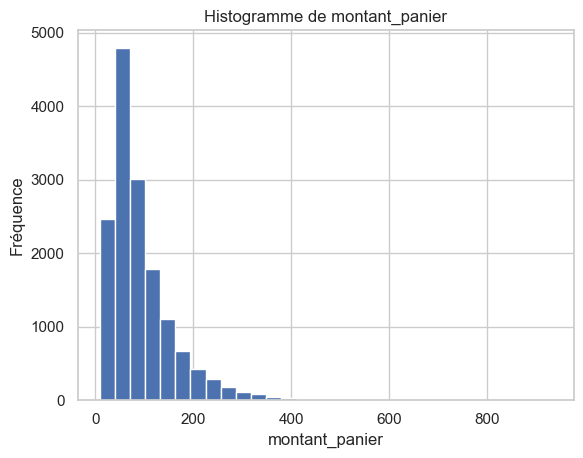

In [48]:
#  Histogramme

plt.figure()
plt.hist(serie, bins=30)
plt.title(f"Histogramme de {variable}")
plt.xlabel(variable)
plt.ylabel("Fréquence")
plt.show()

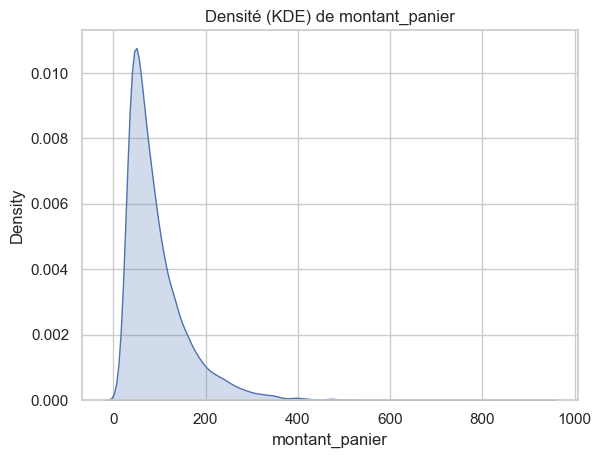

In [49]:

#  Densité (KDE) si seaborn est disponible

if sns is not None:
    plt.figure()
    sns.kdeplot(serie, fill=True)
    plt.title(f"Densité (KDE) de {variable}")
    plt.xlabel(variable)
    plt.show()
else:
    print("Seaborn n'est pas installé, KDE non tracé.")
